# Upload Dataset

In [ ]:
from google.colab import files
files.upload()

!unzip dataset.zip

Saving dataset.zip to dataset.zip
Archive:  dataset.zip
   creating: dataset/
   creating: dataset/Giraffe/
  inflating: dataset/Giraffe/Giraffe (1).jpg  
  inflating: dataset/Giraffe/Giraffe (10).jpg  
  inflating: dataset/Giraffe/Giraffe (2).jpg  
  inflating: dataset/Giraffe/Giraffe (3).jpg  
  inflating: dataset/Giraffe/Giraffe (4).jpg  
  inflating: dataset/Giraffe/Giraffe (5).jpg  
  inflating: dataset/Giraffe/Giraffe (6).jpg  
  inflating: dataset/Giraffe/Giraffe (7).jpg  
  inflating: dataset/Giraffe/Giraffe (8).jpg  
  inflating: dataset/Giraffe/Giraffe (9).jpg  
   creating: dataset/Horse/
  inflating: dataset/Horse/Horse (1).jpg  
  inflating: dataset/Horse/Horse (10).jpg  
  inflating: dataset/Horse/Horse (2).jpg  
  inflating: dataset/Horse/Horse (3).jpg  
  inflating: dataset/Horse/Horse (4).jpg  
  inflating: dataset/Horse/Horse (5).jpg  
  inflating: dataset/Horse/Horse (6).jpg  
  inflating: dataset/Horse/Horse (7).jpg  
  inflating: dataset/Horse/Horse (8).jpg  
  inf

# Load and Create Dataset

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def create_dataset(path):
    img_data_array = []
    class_name = []
    num_classes = len(next(os.walk(path))[1])
    for dir in os.listdir(path):
        for file in os.listdir(os.path.join(path, dir)):
            if any([file.endswith(x) for x in ['.jpeg', '.jpg']]):
                image_path = os.path.join(path, dir, file)
                image = cv2.imread(image_path, 0)
                img_data_array.append(image)
                class_name.append(dir)
    return img_data_array, class_name, num_classes

In [ ]:
x_data, y_data, num_classes = create_dataset("dataset")

# Extract Features & Match using SIFT

In [ ]:
sift = cv2.SIFT_create()
kp = []
desc = []

In [ ]:
for i in range(len(x_data)):
    keypoints, descriptors = sift.detectAndCompute(x_data[i], None) #None -> No Mask
    kp.append(keypoints) # The keypoints are detected features in the image.
    desc.append(descriptors) # The descriptors are feature vectors that are used to represent the keypoints

kp = np.array(kp, dtype = object)
desc = np.array(desc, dtype = object)

Number of Good Matches: 3
Number of Good Matches: 8
Number of Good Matches: 2
Number of Good Matches: 6
Number of Good Matches: 8
Number of Good Matches: 7
Number of Good Matches: 5
Number of Good Matches: 8
Number of Good Matches: 4
Number of Good Matches: 5
Number of Good Matches: 13
Number of RANSAC Matches: 6
Number of Good Matches: 13
Number of RANSAC Matches: 5
Number of Good Matches: 36
Number of RANSAC Matches: 13
Number of Good Matches: 11
Number of RANSAC Matches: 5
Number of Good Matches: 11
Number of RANSAC Matches: 5
Number of Good Matches: 14
Number of RANSAC Matches: 6
Number of Good Matches: 20
Number of RANSAC Matches: 8
Number of Good Matches: 13
Number of RANSAC Matches: 5
Number of Good Matches: 13
Number of RANSAC Matches: 5


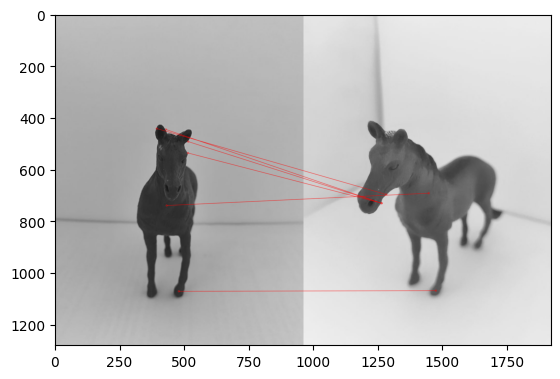

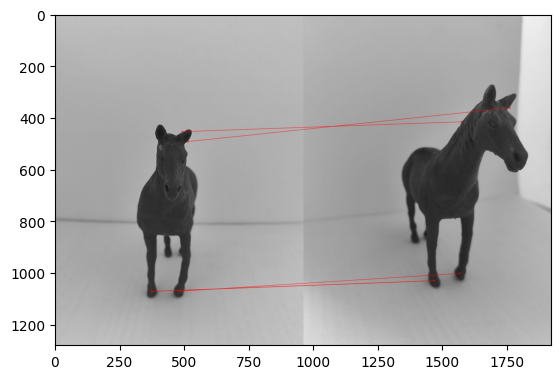

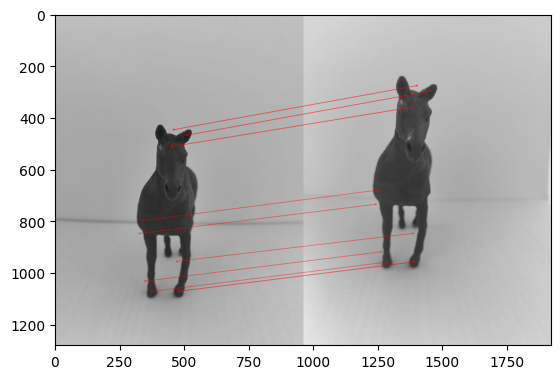

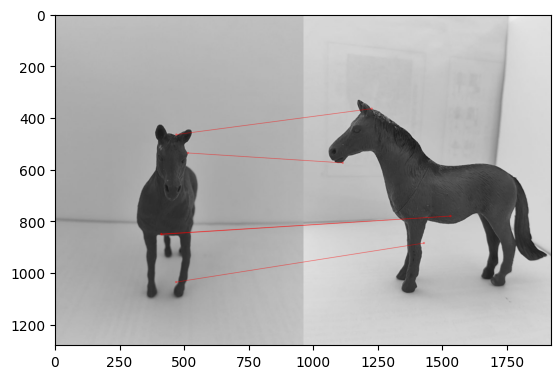

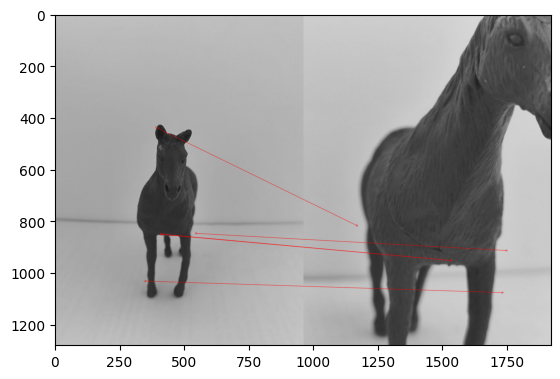

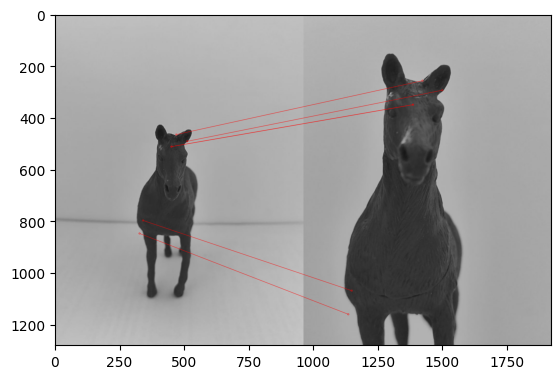

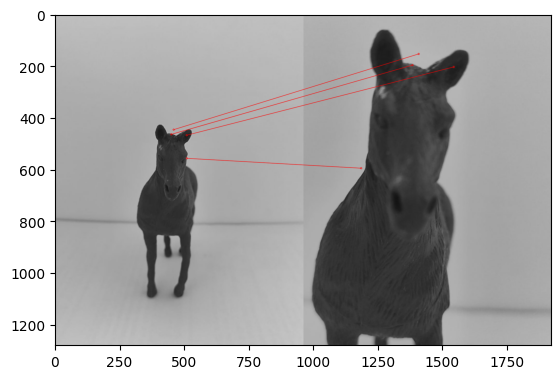

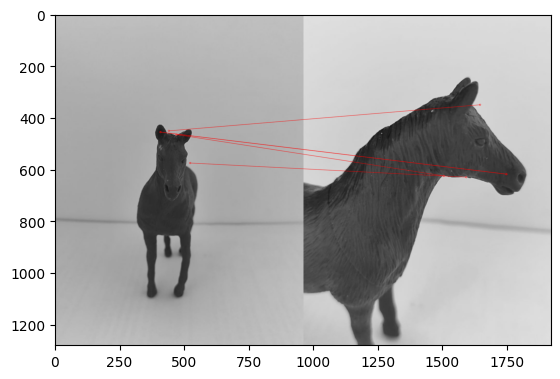

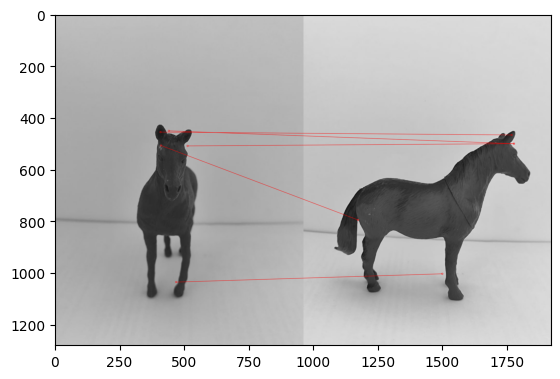

In [ ]:
bf = cv2.BFMatcher()
sel_img = 15
MIN_MATCH_COUNT = 10

for i in range(len(x_data)):
  if i==sel_img:
    continue

  matches = bf.knnMatch(desc[sel_img], desc[i], k=2)
  #print("Number of Matches: {}".format(len(matches)))

  # Apply ratio test
  good = []
  for m,n in matches:
      if m.distance < 0.7*n.distance:
          good.append(m)

  print("Number of Good Matches: {}".format(len(good)))

  if len(good) > MIN_MATCH_COUNT:
    # Extract location of good matches
    src_pts = np.float32([ kp[sel_img][m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp[i][m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    #Find Homography Matrix
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    print("Number of RANSAC Matches: {}".format(sum(matchesMask)))

    plt.figure()
    x = cv2.drawMatches(x_data[sel_img], kp[sel_img], x_data[i], kp[i], good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS, matchColor = (255,0,0), matchesMask= matchesMask)
    plt.imshow(x)

  else:
    #print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None